<a href="https://colab.research.google.com/github/dedemasutti/Machine-Learning/blob/main/Machine_Learning(algoritmo_RandomForest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando as bibliotecas

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### Carregando os dados

In [6]:
dados_de_vendas = pd.read_csv('/content/dados_vendas.csv')

### Pré-processamento dos dados

In [7]:
# Definir as variáveis independentes (Unidades Vendidas) e a variável dependente (Total de Vendas)
X = dados_de_vendas['Unidades Vendidas'].values.reshape(-1, 1)
y = dados_de_vendas['Total de Vendas'].values

# Divide o dataset em conjunto de treinamento e conjunto de teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Treinando o modelo

In [8]:
# Inicializar e treinar o modelo Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
# Fazer previsões com o conjunto de teste
y_pred = random_forest_model.predict(X_test)

# Calcular o erro quadrático médio (MSE) e o coeficiente de determinação (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro quadrático médio (MSE): {mse:.2f}")
print(f"Coeficiente de determinação (R²): {r2:.2f}")

Erro quadrático médio (MSE): 338996.58
Coeficiente de determinação (R²): 0.21


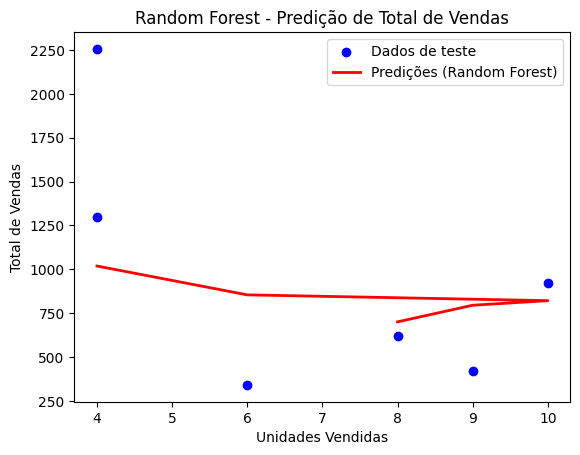

In [10]:
# Plotar os pontos do conjunto de teste e as previsões do modelo Random Forest
plt.scatter(X_test, y_test, color='blue', label='Dados de teste')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predições (Random Forest)')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Total de Vendas')
plt.legend()
plt.title('Random Forest - Predição de Total de Vendas')
plt.show()


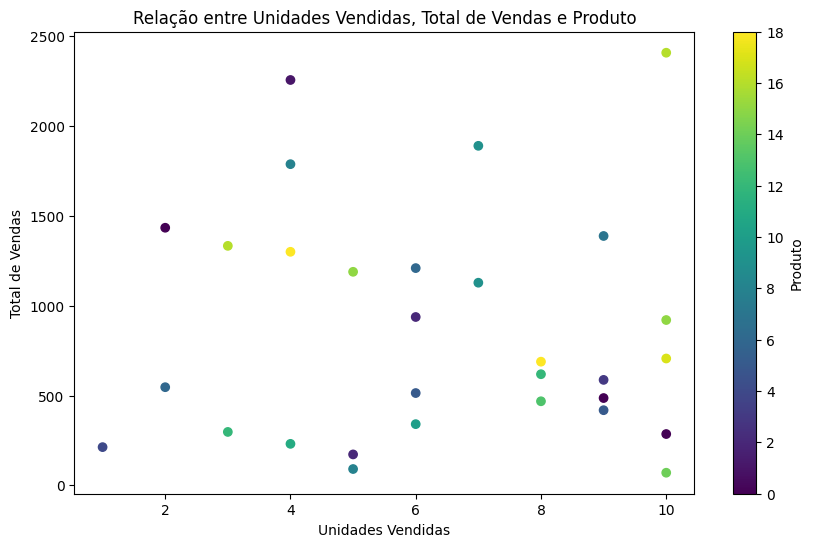

In [12]:
# Scatter plot com cores diferentes para cada produto
plt.figure(figsize=(10, 6))
plt.scatter(dados_de_vendas['Unidades Vendidas'], dados_de_vendas['Total de Vendas'], c=dados_de_vendas['Produto'].astype('category').cat.codes, cmap='viridis')
plt.colorbar(label='Produto')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Total de Vendas')
plt.title('Relação entre Unidades Vendidas, Total de Vendas e Produto')
plt.show()


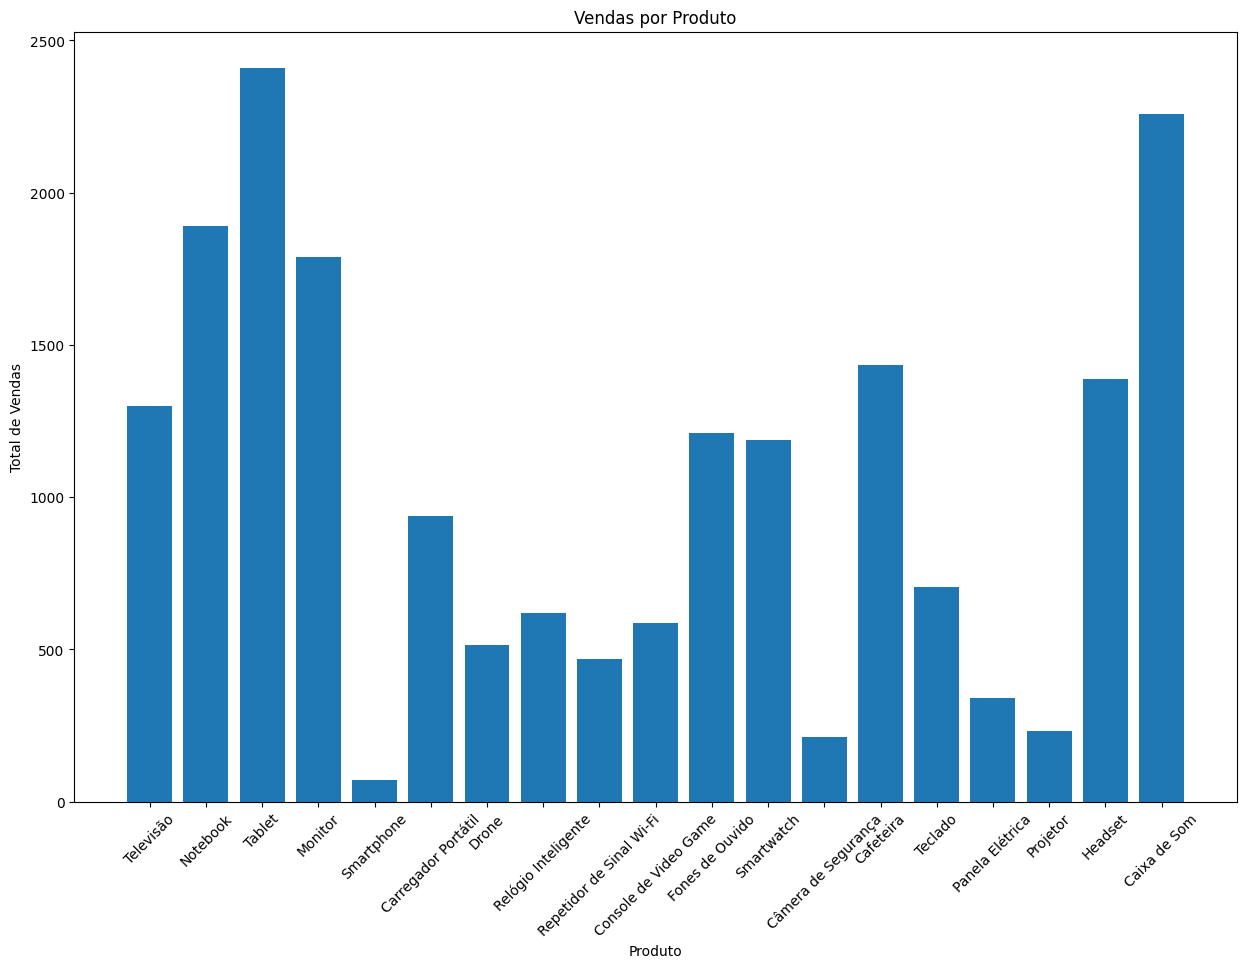

In [15]:
# Gráfico de barras para visualizar as vendas por produto
plt.figure(figsize=(15, 10))
plt.bar(dados_de_vendas['Produto'], dados_de_vendas['Total de Vendas'])
plt.xlabel('Produto')
plt.ylabel('Total de Vendas')
plt.title('Vendas por Produto')
plt.xticks(rotation=45)
plt.show()


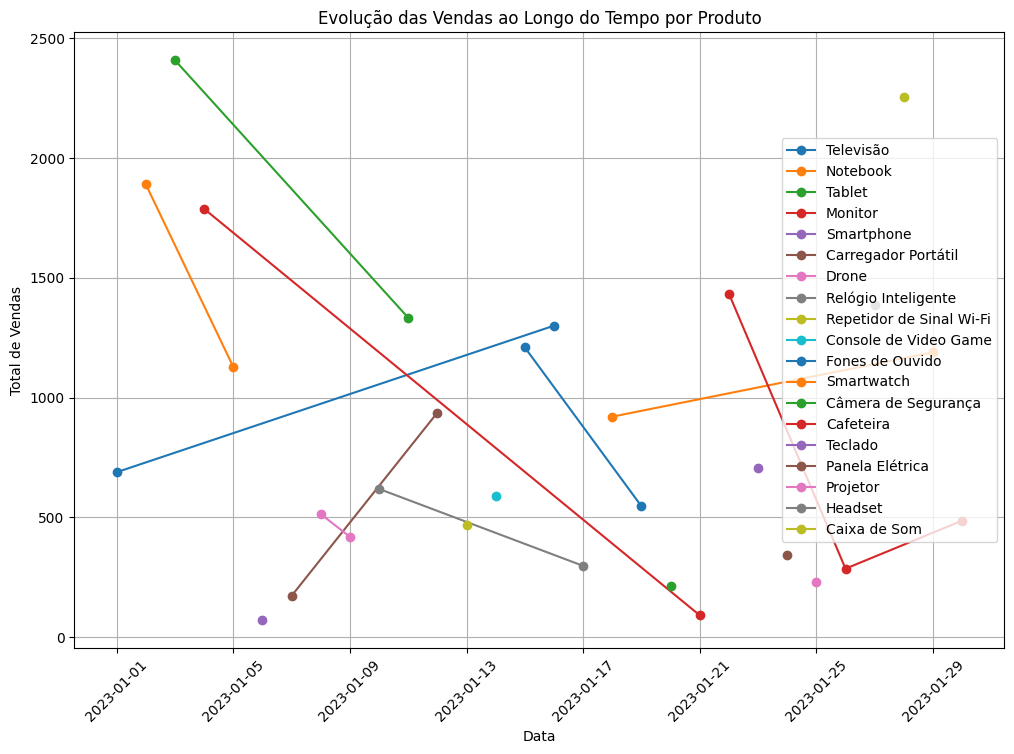

In [16]:
# Gráfico de linhas para visualizar a evolução das vendas ao longo do tempo por produto
dados_de_vendas['Data'] = pd.to_datetime(dados_de_vendas['Data'])
plt.figure(figsize=(12, 8))
for produto in dados_de_vendas['Produto'].unique():
    df_produto = dados_de_vendas[dados_de_vendas['Produto'] == produto]
    plt.plot(df_produto['Data'], df_produto['Total de Vendas'], label=produto, marker='o')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.title('Evolução das Vendas ao Longo do Tempo por Produto')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
